# WeatherPy

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import requests
import time
import os
import numpy as np
from scipy import stats
from scipy.stats import linregress
import pandas as pd
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

### Create List of Cities

In [2]:
# Specify range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# Create list for holding lat_longs and cities
lat_long = []
cities = []

# Create a set of random lat and long combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

# Find nearest city for each combination of latitude and longiitude
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, append to the cities list
    if city not in cities:
        cities.append(city)

# Print the len() of the cities list to ensure >500.
print(f"The number cities stored: {len(cities)}")

The number cities stored: 604


### Run API to extract weather data

In [3]:
# Specify URL and units (metric).
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# set up lists to hold reponses
city_name=[]
country=[]
date=[]
latitude = []
longitude=[]
max_temperature = []
cloudiness = []
humidity = []
wind_speed = []

city_count = 0

# Loop through the cities list and do the following.
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        time.sleep(1)
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        city_count=city_count+1
        print(f"Processing Record {city_count} : {city}")
          
    except KeyError:
        print("City not found. Skipping...")


Processing Record 1 : albany
Processing Record 2 : hilo
Processing Record 3 : dunedin
Processing Record 4 : sitka
City not found. Skipping...
Processing Record 5 : klaksvik
Processing Record 6 : the pas
Processing Record 7 : new norfolk
Processing Record 8 : ushuaia
Processing Record 9 : colac
City not found. Skipping...
Processing Record 10 : hithadhoo
Processing Record 11 : castro
Processing Record 12 : qaanaaq
Processing Record 13 : mataura
Processing Record 14 : evensk
Processing Record 15 : mrkonjic grad
Processing Record 16 : grafton
Processing Record 17 : korla
Processing Record 18 : port alfred
Processing Record 19 : antalaha
Processing Record 20 : baykit
Processing Record 21 : souillac
Processing Record 22 : vaini
Processing Record 23 : coihaique
Processing Record 24 : eirunepe
Processing Record 25 : tabas
Processing Record 26 : buraydah
City not found. Skipping...
Processing Record 27 : cape town
Processing Record 28 : busselton
Processing Record 29 : saint-philippe
Processin

Processing Record 233 : soe
Processing Record 234 : yellowknife
City not found. Skipping...
Processing Record 235 : smithers
Processing Record 236 : east london
Processing Record 237 : timra
Processing Record 238 : beli manastir
Processing Record 239 : san jeronimo
Processing Record 240 : vaitape
Processing Record 241 : khuldabad
Processing Record 242 : saint-augustin
Processing Record 243 : bay roberts
Processing Record 244 : la asuncion
City not found. Skipping...
Processing Record 245 : provideniya
Processing Record 246 : bodden town
Processing Record 247 : neiafu
Processing Record 248 : montepuez
Processing Record 249 : ilhabela
Processing Record 250 : doha
City not found. Skipping...
Processing Record 251 : andros town
Processing Record 252 : butaritari
Processing Record 253 : puerto narino
Processing Record 254 : tupaciguara
Processing Record 255 : nagorsk
Processing Record 256 : saint anthony
Processing Record 257 : del rio
Processing Record 258 : laguna
Processing Record 259 : 

Processing Record 458 : stromness
Processing Record 459 : romny
Processing Record 460 : morant bay
Processing Record 461 : hualmay
Processing Record 462 : namatanai
Processing Record 463 : saldanha
Processing Record 464 : leh
Processing Record 465 : sur
Processing Record 466 : erice
Processing Record 467 : oussouye
Processing Record 468 : mount isa
Processing Record 469 : alta floresta
Processing Record 470 : sulangan
Processing Record 471 : porto belo
Processing Record 472 : aswan
Processing Record 473 : prince rupert
Processing Record 474 : ust-nera
Processing Record 475 : am timan
Processing Record 476 : amga
Processing Record 477 : mangan
Processing Record 478 : mabaruma
Processing Record 479 : nizwa
Processing Record 480 : santa catalina
City not found. Skipping...
Processing Record 481 : menlo park
Processing Record 482 : tura
Processing Record 483 : beidao
Processing Record 484 : cayon
Processing Record 485 : rochegda
Processing Record 486 : khasan
Processing Record 487 : matara

In [5]:
# Check all lists filled, >500 and of equal length
print(len(city_name))
print(len(country))
print(len(country))
print(len(date))
print(len(latitude))
print(len(longitude))
print(len(max_temperature))
print(len(cloudiness))
print(len(humidity))
print(len(wind_speed))

551
551
551
551
551
551
551
551
551
551


In [6]:
# Create and display new DataFrame
city_weather_df = pd.DataFrame({
    'City':city_name,
    'Country':country,
    'Date':date,
    'Latitude':latitude,
    'Longitude':longitude,
    'Max Temperature':max_temperature,
    'Cloudiness':cloudiness,
    'Humidity':humidity,
    'Wind Speed':wind_speed,
     })
 
city_weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Cloudiness,Humidity,Wind Speed
0,Albany,US,1631234337,42.6001,-73.9662,18.94,100,94,1.79
1,Hilo,US,1631234318,19.7297,-155.0900,27.92,90,67,4.12
2,Dunedin,NZ,1631234258,-45.8742,170.5036,11.56,69,80,4.16
3,Sitka,US,1631234526,57.0531,-135.3300,15.94,90,55,5.66
4,Klaksvík,FO,1631234529,62.2266,-6.5890,9.51,100,69,3.81


In [7]:
# Store data in CSV file
city_weather_df.to_csv("output_files/cities.csv",encoding="utf-8",index = False)

### Plotting the Data

#### Temperature (degrees C) vs. Latitude (degrees)

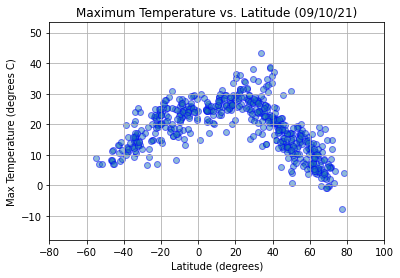

In [8]:
plt.scatter(city_weather_df["Latitude"],city_weather_df["Max Temperature"],alpha=0.5,edgecolors='blue')
plt.title(f"Maximum Temperature vs. Latitude ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude (degrees)") 
plt.ylabel("Max Temperature (degrees C)")
plt.xlim(-80,100)
plt.ylim(min(city_weather_df["Max Temperature"])-10,max(city_weather_df['Max Temperature'])+10)
plt.grid()
plt.savefig(os.path.join("output_files",f"Max_Temperature_vs_Latitude.png"))

##### The above scatter plot shows the relationship between the latitude (distance from the equator) of each city and the maximum temperature recorded in that city. There is a strong relationship between these two variables that show that the closer to the equator (closer to 0 degrees) the city is, the higher the maximum temperature. This is the relationship we expect.

#### Humidity (%) vs. Latitude (degrees)

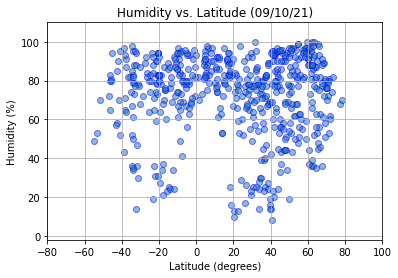

In [9]:
plt.scatter(city_weather_df["Latitude"],city_weather_df["Humidity"],alpha=0.5,edgecolors='blue')
plt.title(f"Humidity vs. Latitude ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude (degrees)") 
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.ylim(min(city_weather_df["Humidity"])-10,max(city_weather_df["Humidity"])+10)
plt.grid()
plt.savefig(os.path.join("output_files",f"Humidity_vs_Latitude.png"))

##### The above scatter plot shows the relationship between the latitude (distance from the equator) of each city and the humidity recorded in that city. There appears to be no relationship between these two variables which suggests that humidity in a city is independent of its location (latitude).

#### Cloudiness (%) vs. Latitude (degrees)

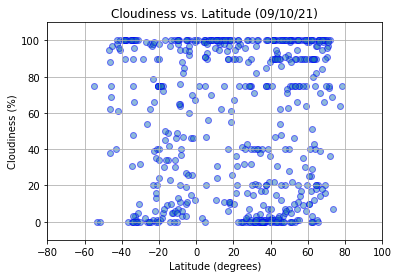

In [10]:
plt.scatter(city_weather_df["Latitude"],city_weather_df["Cloudiness"],alpha=0.5,edgecolors='blue')
plt.title(f"Cloudiness vs. Latitude ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude (degrees)") 
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(min(city_weather_df["Cloudiness"])-10,max(city_weather_df["Cloudiness"])+10)
plt.grid()
plt.savefig(os.path.join("output_files",f"Cloudiness_vs_Latitude.png"))

##### The above scatter plot shows the relationship between the latitude (distance from the equator) of each city and the cloudiness recorded in that city. There appears to be no relationship between these two variables which suggests that the percentage of cloud cover (cloudiness) in a city is independent of its location (latitude).

#### Wind Speed (m/s) vs. Latitude (degrees)

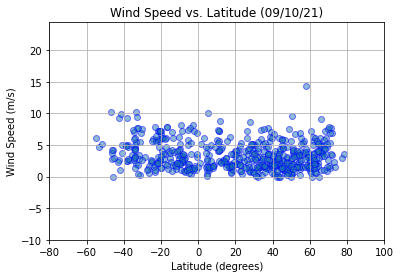

In [11]:
plt.scatter(city_weather_df["Latitude"],city_weather_df["Wind Speed"],alpha=0.5,edgecolors='blue')
plt.title(f"Wind Speed vs. Latitude ({time.strftime('%m/%d/%y')})")
plt.xlabel("Latitude (degrees)") 
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-80,100)
plt.ylim(min(city_weather_df["Wind Speed"])-10,max(city_weather_df["Wind Speed"])+10)
plt.grid()
plt.savefig(os.path.join("output_files",f"Wind_Speed_vs_Latitude.png"))

##### The above scatter plot shows the relationship between the latitude (distance from the equator) of each city and the wind speed recorded in that city. There appears to be no relationship between these two variables which suggests that the wind speed in a city is independent of its location (latitude).

### Linear Regressions

In [12]:
# Separate into Northern and Southern hemisphere DataFrames
northern_hemisphere_df = city_weather_df.loc[city_weather_df["Latitude"] >= 0]
southern_hemisphere_df = city_weather_df.loc[city_weather_df["Latitude"] < 0]

#### Northern Hemisphere - Max Temperature vs. Latitude

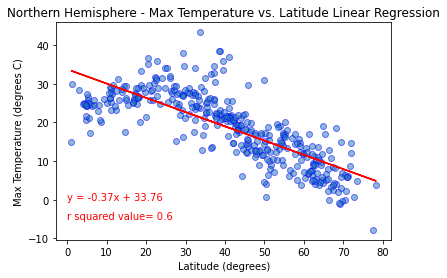

In [45]:
# Undertake the linear regression and plot
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),2))

plt.scatter(x_values,y_values,alpha=0.5,edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=10,color="red")
plt.annotate(r2_value,(0,-5),fontsize=10,color="red")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (degrees C)")

# Save the figure
plt.savefig(os.path.join("output_files",f"NH_Temp_vs_Latitude_LR.png"))

##### There is a moderate negative correlation between latitude and max temperature for the northern hemisphere.

#### Southern Hemisphere - Max Temperature vs. Latitude

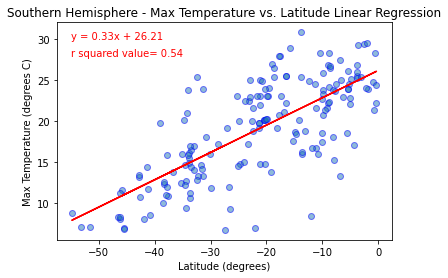

In [46]:
# Undertake the linear regression and plot
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),2))

plt.scatter(x_values,y_values,alpha=0.5,edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=10,color="red")
plt.annotate(r2_value,(-55,28),fontsize=10,color="red")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (degrees C)")

# Save the figure
plt.savefig(os.path.join("output_files",f"SH_Temp_vs_Latitude_LR.png"))

##### There is a moderate positive correlation between latitude and maximum temperature for the southern hemisphere.

#### Northern Hemisphere - Humidity vs. Latitude

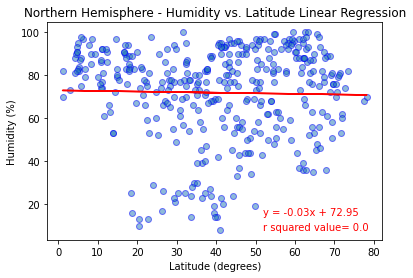

In [47]:
# Undertake the linear regression and plot
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),2))

plt.scatter(x_values,y_values,alpha=0.5,edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(52,15),fontsize=10,color="red")
plt.annotate(r2_value,(52,8),fontsize=10,color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(os.path.join("output_files",f"NH_Humidity_vs_Latitude_LR.png"))

##### There is no correlation between latitude and humidity for the northern hemisphere.

#### Southern Hemisphere - Humidity vs. Latitude

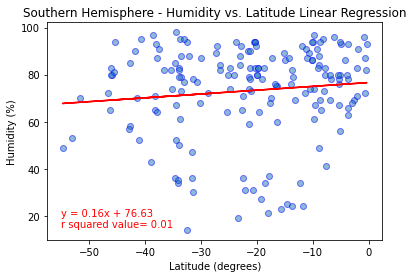

In [48]:
# Undertake the linear regression and plot
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),2))

plt.scatter(x_values,y_values,alpha=0.5,edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=10,color="red")
plt.annotate(r2_value,(-55,15),fontsize=10,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(os.path.join("output_files",f"SH_Humidity_vs_Latitude_LR.png"))

##### There is no correlation between latitude and humidity for the southern hemisphere.

#### Northern Hemisphere - Cloudiness vs. Latitude

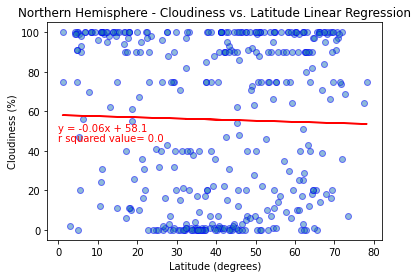

In [49]:
# Undertake the linear regression and plot
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),2))

plt.scatter(x_values,y_values,alpha=0.5,edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=10,color="red")
plt.annotate(r2_value,(0,45),fontsize=10,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(os.path.join("output_files",f"NH_Cloudiness_vs_Latitude_LR.png"))

##### There is no correlation between latitude and cloudiness for the northern hemisphere.

#### Southern Hemisphere - Cloudiness vs. Latitude

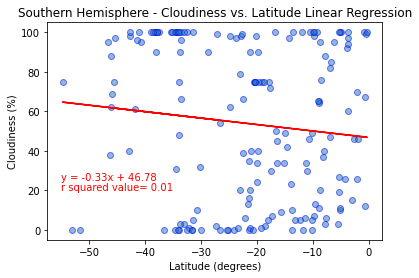

In [50]:
# Undertake the linear regression and plot
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),2))

plt.scatter(x_values,y_values,alpha=0.5,edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=10,color="red")
plt.annotate(r2_value,(-55,20),fontsize=10,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(os.path.join("output_files",f"SH_Cloudiness_vs_Latitude_LR.png"))

##### There is no correlation between latitude and cloudiness for the southern hemisphere.

#### Northern Hemisphere - Wind Speed vs. Latitude

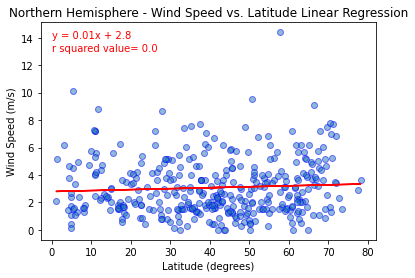

In [51]:
# Undertake the linear regression and plot
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),2))

plt.scatter(x_values,y_values,alpha=0.5,edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,14),fontsize=10,color="red")
plt.annotate(r2_value,(0,13),fontsize=10,color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig(os.path.join("output_files",f"NH_Wind_Speed_vs_Latitude_LR.png"))

##### There is no correlation between latitude and wind speed for the northern hemisphere.

#### Southern Hemisphere - Wind Speed vs. Latitude

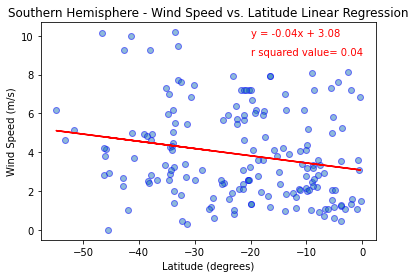

In [52]:
# Undertake the linear regression and plot
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2_value = "r squared value= " + str(round((rvalue**2),2))

plt.scatter(x_values,y_values,alpha=0.5,edgecolors='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=10,color="red")
plt.annotate(r2_value,(-20,9),fontsize=10,color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig(os.path.join("output_files",f"SH_Wind_Speed_vs_Latitude_LR.png"))

##### There is no correlation between latitude and wind speed for the southern hemisphere.